In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [1]:
!pip install opencv-python==4.1.2.30
!pip install keras==2.4.3 numpy==1.19.3 pillow==7.0.0 scipy==1.4.1 h5py==2.10.0 matplotlib==3.3.2 
!pip install tensorflow==2.4.0
!pip install tensorflow-gpu==2.4.0
!pip install imageai --upgrade

     |████████████████████████████████| 14.9MB 194kB/s 
     |████████████████████████████████| 2.1MB 40.3MB/s 
     |████████████████████████████████| 11.6MB 25.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: bokeh 2.3.1 has requirement pillow>=7.1.0, but you'll have pillow 7.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


     |████████████████████████████████| 394.7MB 38kB/s 
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 394.7MB 46kB/s 
     |████████████████████████████████| 163kB 7.4MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=3c4b31477315535ce1ebf70db263a42cd46428ce79a2d0ce37f6f32373de76af
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-resnet


In [ ]:
import os
import cv2
import numpy as np
from imageai.Detection.Custom import DetectionModelTrainer,CustomObjectDetection

In [ ]:
trainer=DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="/content/drive/MyDrive/Liscence plate dectection")
trainer.setTrainConfig(object_names_array=["licence"],batch_size=4,num_experiments=20, train_from_pretrained_model='/content/drive/MyDrive/Liscence plate dectection/yolo.h5' )

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.74
Anchor Boxes generated.
Detection configuration saved in  /content/drive/MyDrive/Liscence plate dectection/json/detection_config.json


In [ ]:

trainer.trainModel()


Evaluating over 87 samples taken as 20.00% of the training set given at /content/drive/MyDrive/Liscence plate dectection/train
Training over 346 samples  given at /content/drive/MyDrive/Liscence plate dectection/train
Training on: 	['licence']
Training with Batch Size:  4
Number of Training Samples:  346
Number of Validation Samples:  87
Number of Experiments:  20
Training with transfer learning from pretrained Model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/20
696/696 [==============================] - 407s 571ms/step - loss: 48.2417 - yolo_layer_6_loss: 5.4409 - yolo_layer_7_loss: 12.2752 - yolo_layer_8_loss: 19.5036 - val_loss: 22.7683 - val_yolo_layer_6_loss: 2.8662 - val_yolo_layer_7_loss: 5.6080 - val_yolo_layer_8_loss: 7.2518
Epoch 2/20
696/696 [==============================] - 394s 565ms/step - loss: 20.0255 - yolo_layer_6_loss: 2.7036 - yolo_layer_7_loss: 4.7958 - yolo_layer_8_loss: 6.2193 - val_loss: 29.5328 - val_yolo_layer_6_loss: 12.4068 - val_yolo_layer_7_loss: 5.7314 - val_yolo_layer_8_loss: 6.1050
Epoch 3/20
696/696 [==============================] - 399s 572ms/step - loss: 16.9146 - yolo_layer_6_loss: 2.4412 - yolo_layer_7_loss: 4.0733 - yolo_layer_8_loss: 5.2784 - val_loss: 16.4809 - val_yolo_layer_6_loss: 2.4649 - val_yolo_layer_7_loss: 3.4875 - val_yolo_layer_8_loss: 5.8053
Epoch 4/20
696/696 [==============================] - 391s 561ms/step - loss: 15.8720 - yolo_layer_6_loss: 2.6831 - yolo_layer_7_loss: 3.61

In [ ]:
trainer=DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory='/content/drive/MyDrive/Liscence plate dectection')
metrics=trainer.evaluateModel(model_path='/content/drive/MyDrive/Liscence plate dectection/models',json_path='/content/drive/MyDrive/Liscence plate dectection/json/detection_config.json',iou_threshold=0.5,object_threshold=0.3,nms_threshold=0.5)

Starting Model evaluation....
Evaluating over 87 samples taken as 20.00% of the training set given at /content/drive/MyDrive/Liscence plate dectection/train
Training over 346 samples  given at /content/drive/MyDrive/Liscence plate dectection/train


/usr/local/lib/python3.7/dist-packages/imageai/Detection/Custom/utils/utils.py:204: RuntimeWarning: overflow encountered in exp
  w = anchors[2 * b + 0] * np.exp(w) / net_w  # unit: image width


skipping the evaluation of /content/drive/MyDrive/Liscence plate dectection/models/detection_model-ex-001--loss-0031.870.h5 because following exception occurred: cannot convert float infinity to integer
Model File:  /content/drive/MyDrive/Liscence plate dectection/models/detection_model-ex-002--loss-0018.937.h5 

Evaluation samples:  87
Using IoU:  0.5
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
licence: 0.1199
mAP: 0.1199
Model File:  /content/drive/MyDrive/Liscence plate dectection/models/detection_model-ex-003--loss-0016.915.h5 

Evaluation samples:  87
Using IoU:  0.5
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
licence: 0.3501
mAP: 0.3501
Model File:  /content/drive/MyDrive/Liscence plate dectection/models/detection_model-ex-004--loss-0015.666.h5 

Evaluation samples:  87
Using IoU:  0.5
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
licence: 0.3044
mAP: 0.3044
Model File:  /content/drive/MyDrive/Liscence plate dectection/

In [ ]:
detector=CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath('/content/drive/MyDrive/Liscence plate dectection/models/detection_model-ex-014--loss-0011.454.h5')
detector.setJsonPath('/content/drive/MyDrive/Liscence plate dectection/json/detection_config.json')
detector.loadModel()
detections=detector.detectObjectsFromImage(input_image='/content/drive/MyDrive/Liscence plate dectection/test6.png',output_image_path='/content/drive/MyDrive/Liscence plate dectection/found.jpg', minimum_percentage_probability=25)
flag=1
img= cv2.imread('/content/drive/MyDrive/Liscence plate dectection/test6.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('/content/drive/MyDrive/Liscence plate dectection/test6.png', cv2.IMREAD_COLOR)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for detection in detections:
  if detection["name"]=='licence':
    # if((detection["box_points"][3]-detection["box_points"][1])>20 and (detection["box_points"][2]-detection["box_points"][0])>20):
    print("found!")
    print(detection["name"] , " : ", detection["percentage_probability"], " : ", detection["box_points"] )
    tl = (detection["box_points"][0],detection["box_points"][1])
    br = (detection["box_points"][2],detection["box_points"][3])
    # label= detection['name']
    # percent=str(detection["percentage_probability"])
    img = cv2.rectangle(img, tl, br, (0,255 , 0), 3)
    # img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 255, 0), 1)
    # img = cv2.putText(img, percent, br, cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 255, 0), 1)
    flag=0
cv2.imwrite('/content/drive/MyDrive/Liscence plate dectection/found.jpg',img)
if(flag):
  print('not found')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


found!
licence  :  63.94060254096985  :  [311, 166, 491, 206]


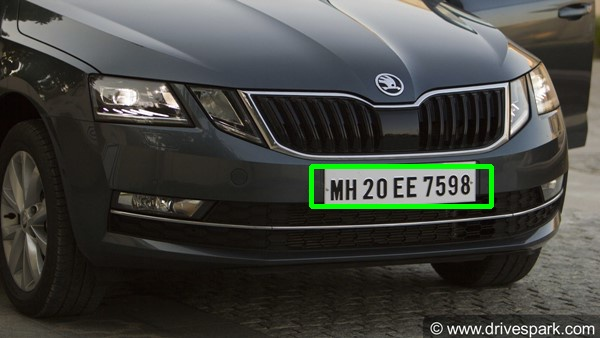

In [ ]:
# import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
if flag==0:
  res= cv2.imread('/content/drive/MyDrive/Liscence plate dectection/found.jpg')
  cv2_imshow(res)

  

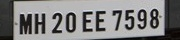

In [ ]:
if flag==0:
  out = img2[detection["box_points"][1]:detection["box_points"][3], detection["box_points"][0]:detection["box_points"][2]]
  cv2.imwrite('/content/drive/MyDrive/Liscence plate dectection/out.jpg',out )
  out = cv2.imread('/content/drive/MyDrive/Liscence plate dectection/out.jpg')
  # plt.imshow(out, cmap = 'gray' )
  cv2_imshow(out)
  # plt.show()